In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
sns.set(style="whitegrid")

# Putting it all together

In [5]:
df = pd.read_csv('feature_selection/resources/cleaned_movie_data.csv', index_col=0)

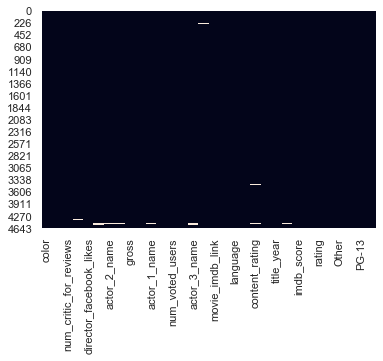

In [6]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
CRISP DM 

SyntaxError: invalid syntax (<ipython-input-7-ed9db08aef7b>, line 1)

In [8]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,G,Other,PG,PG-13,R
count,4154.000000,4155.000000,4156.00000,4144.000000,4153.000000,4.157000e+03,4.157000e+03,4157.000000,4150.000000,4156.000000,4.157000e+03,4156.000000,4151.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,159.384208,109.561492,747.16001,724.113176,7347.613051,4.849151e+07,9.752737e+04,10887.253067,1.374217,312.961742,4.491703e+07,2003.267565,1888.954710,6.468631,8734.818138,0.022853,0.046909,0.146981,0.336781,0.446476
std,122.582072,22.667591,2946.34955,1811.189057,15053.307332,6.846135e+07,1.472840e+05,18520.203794,2.041144,399.514498,2.151887e+08,9.945465,4371.346743,1.050852,20792.379704,0.149453,0.211469,0.354130,0.472666,0.497187
min,1.000000,34.000000,0.00000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,95.000000,10.00000,172.750000,699.000000,5.354039e+06,1.516900e+04,1739.000000,0.000000,93.000000,1.000000e+07,1999.000000,343.500000,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,105.000000,57.00000,416.000000,1000.000000,2.552850e+07,4.641700e+04,3698.000000,1.000000,190.000000,2.500000e+07,2005.000000,650.000000,6.600000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,217.000000,119.000000,218.00000,676.000000,12000.000000,6.231888e+07,1.146100e+05,15569.000000,2.000000,374.000000,5.091162e+07,2010.000000,962.000000,7.200000,10000.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,813.000000,334.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning:
- Removing Outliers 
- Handling missing values
    - drop
    - impute the mean, or median, mode
    - Impute based on other columns
    - Create column to specify missing value
    - Estimate missing value based on other columns (linear regression)
- Make messy data values consistent
- Proper and Consisten data types ( '3' vs 3)
- Remove Duplicates

## EDA
- Look at distribution of  variables (dist, box plot)
- Measure coorelations between variables
- Check if categorical data is ordinal.
- Check linear relationship with target variable
- Knowing sample statistics of variables
- Perform statistical tests to determine relationships between variables



## Feature Engineering
- Create interactions
- Create polynomial features
- Non-linear transformations 
- Dummy variables for categorical variables
- Combining variables through expressions
- Geospacial Transformations (distance from external points of interest)
- Time transformations and aggregations (year born -> years old, day of week, isholiday())
- Scaling data

## Feature Selection
- Filter methods
    - Multi-Colinearity
    - Select K Best
- Wrapper methods
    - Recursive Feature Elimination
    - Stepwise Selection
- Embedded methods
    - Lasso
    - Feature Importance


## Model Selection
- Cross Validation
- Test Train Split
- Grid Search

In [24]:
df.shape

(4145, 34)

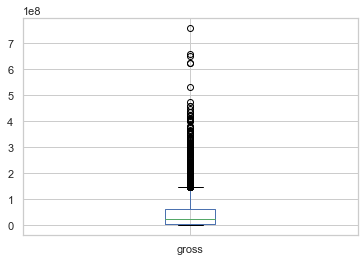

In [11]:
df.boxplot('gross')

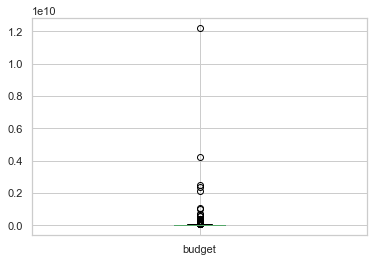

In [12]:
df.boxplot('budget')

In [13]:
df = df[df['budget']<400000000]

In [14]:
df.shape

(4145, 32)

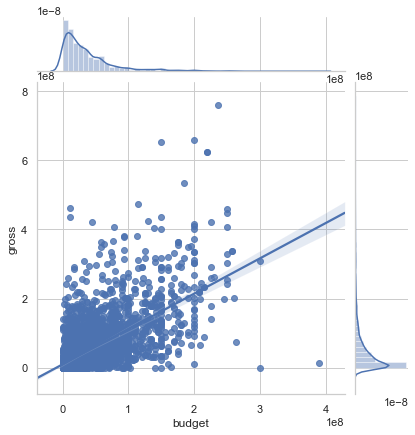

In [15]:
sns.jointplot(x='budget', y='gross', data=df, kind="reg")

In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['budget']])
df['budget_scaled']= scaled

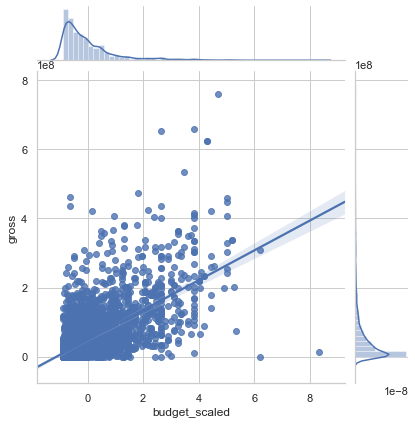

In [17]:
sns.jointplot(x='budget_scaled', y='gross', data=df, kind="reg")

In [18]:
robust_scaler = RobustScaler()
scaled = robust_scaler.fit_transform(df[['budget']])
df['budget_robust']= scaled

In [19]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R,budget_scaled,budget_robust
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,PG-13,0,0,0,1,0,4.710680,5.3000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,PG-13,0,0,0,1,0,6.203291,6.8750
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,PG-13,0,0,0,1,0,4.900218,5.5000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,0,1,0,5.018679,5.6250
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,PG-13,0,0,0,1,0,5.343263,5.9675


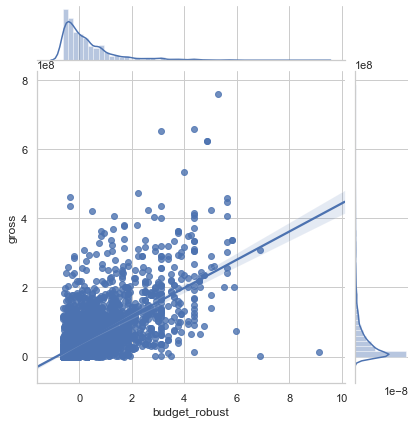

In [20]:
sns.jointplot(x='budget_robust', y='gross', data=df, kind="reg")

In [21]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget']], df['gross'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
def checkresiduals(df, feature, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.predict(df[[feature]])
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()
    stat, p = shapiro(residual)
#     stat, p = normaltest(data)

    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

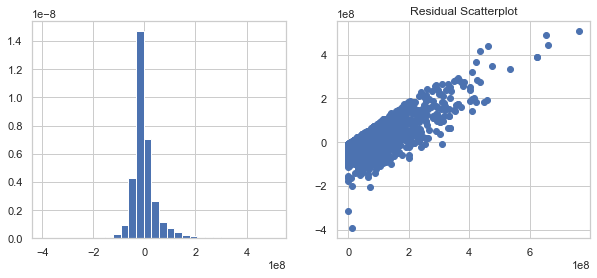

Statistics=0.796, p=0.000
Sample does not look Gaussian (reject H0)


In [23]:
checkresiduals(df, 'budget', 'gross', lm)

In [99]:

df['gross_log'] = np.log(df['gross'])
df['gross_sqrt'] = np.sqrt(df['gross'])

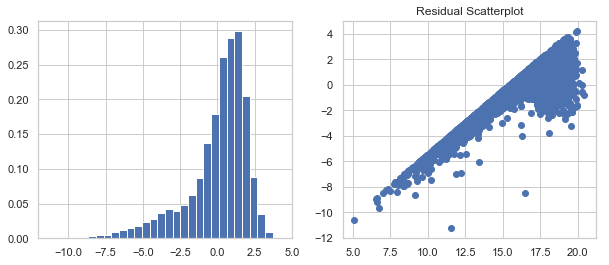

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [100]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget']], df['gross_log'])
checkresiduals(df, 'budget', 'gross_log', lm)

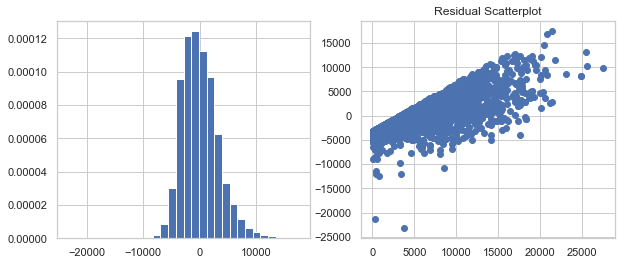

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [101]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget']], df['gross_sqrt'])
checkresiduals(df, 'budget', 'gross_sqrt', lm)

In [102]:
df['budget_log'] = np.log(df['budget'])
df['budget_sqrt'] = np.sqrt(df['budget'])

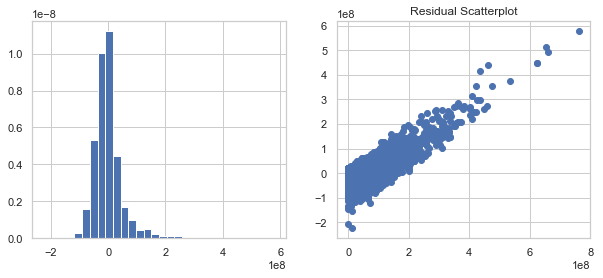

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [103]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget_sqrt']], df['gross'])
checkresiduals(df, 'budget_sqrt', 'gross', lm)

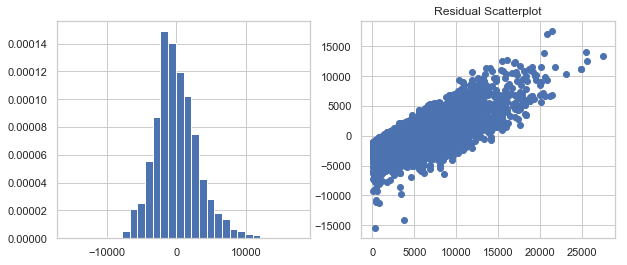

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [104]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget_sqrt']], df['gross_sqrt'])
checkresiduals(df, 'budget_sqrt', 'gross_sqrt', lm)

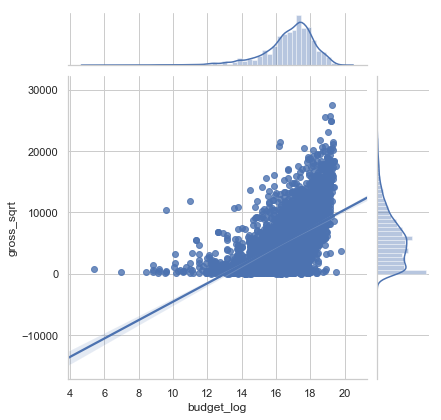

In [105]:
sns.jointplot(x='budget_log', y='gross_sqrt', data=df, kind="reg")

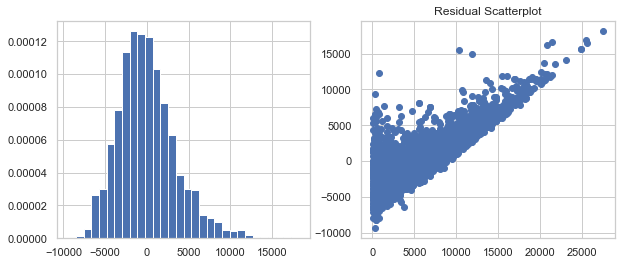

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [106]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget_log']], df['gross_sqrt'])
checkresiduals(df, 'budget_log', 'gross_sqrt', lm)

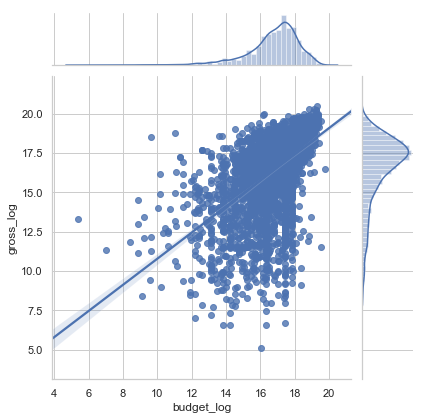

In [107]:
sns.jointplot(x='budget_log', y='gross_log', data=df, kind="reg")

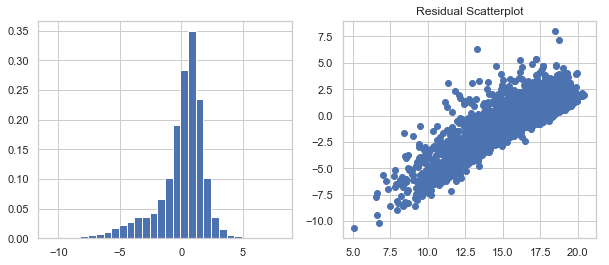

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [108]:
lm = linear_model.LinearRegression()
lm.fit(df[['budget_log']], df['gross_log'])
checkresiduals(df, 'budget_log', 'gross_log', lm)

In [ ]:
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/